In [22]:
import pandas as pd
import numpy as np

# Define categories and associated keywords
categories = {
    "Health & Medical Sciences": [
        "medicine", "medical", "health", "nutrition", "epidemiology", "biomed", "speech", "psychology",
        "neuro", "cognitive", "cell", "microbiology", "genetics", "biochem", "clinical", "physiology"
    ],
    "Business, Finance & Management": [
        "business", "mba", "finance", "marketing", "consulting", "real estate", "administration", "management"
    ],
    "Arts, Literature & Media": [
        "writing", "english", "literature", "journalism", "media", "history", "art", "mfa", "film", "music", "theater", "acting", "comp lit"
    ],
    "Social Sciences, Education & Humanities": [
        "sociology", "anthropology", "political", "policy", "education", "elementary", "teaching", "philosophy",
        "religion", "african-american", "bilingual", "tesol", "school", "social work", "instructional"
    ],
    "STEM (Science, Tech, Engineering, Math)": [
        "science", "math", "physics", "chemistry", "computer", "electrical", "mechanical", "engineering",
        "statistics", "operations research", "biochemistry", "molecular", "quantitative", "computational", "informatics"
    ],
    "Law & Policy": [
        "law", "legal", "juris", "public policy", "international affairs", "sipa", "development", "urban planning",
        "public administration", "security policy"
    ],
    "Environmental & Climate Studies": [
        "earth", "climate", "environment", "conservation", "marine geophysics", "ecology"
    ],
    "Interdisciplinary & Other": []  # default catch-all
}

def remove_elipsis(feature):
    return feature.replace("b'",'').replace("'","")

def categorize_features(feature):
    placed = False
    feature = feature.strip().lower()

    for category, keywords in categories.items():
        if any(keyword in feature for keyword in keywords):
            feature = category
            placed = True
            break
    if not placed:
        feature = "Interdisciplinary & Other"
        
    return feature

In [97]:
df_speedDating = pd.read_csv('./Dataset/speeddating.csv')

# Remove '' from string columns
string_dataset = df_speedDating.select_dtypes(include = ['object'])
for feature in string_dataset.columns:
    df_speedDating[feature] = df_speedDating[feature].apply(lambda x: remove_elipsis(x))

# Restructure field column
df_speedDating['field'] = df_speedDating['field'].apply((lambda x: categorize_features(x)))

# Transform samerace as int
df_speedDating['samerace'] = df_speedDating['samerace'].astype('int')

# Calculate the age difference
df_speedDating['age_diff'] = np.abs(df_speedDating['age'] - df_speedDating['age_o'])

# Drop binned columns and irelevant columns
to_drop = [column_name for column_name in df_speedDating.columns if column_name.startswith('d_') or column_name.startswith('expected_')]
df_speedDating.drop(['has_null', 'wave', 'age', 'age_o', 'race', 'race_o', 'decision', 'decision_o'], axis = 1, inplace = True) 
df_speedDating.drop(to_drop, axis = 1, inplace = True)

columns_numeric = df_speedDating.select_dtypes(include = ['int','float']).columns.tolist()
df_speedDating['met'].fillna(0)
for number in [3.0, 5.0, 6.0, 7.0, 8.0]:
    df_speedDating['met'].replace(number,0)
    
df_speedDating ['gender'] = df_speedDating['gender'].replace('female',0)
df_speedDating ['gender'] = df_speedDating['gender'].replace('male', 1)

df_speedDating.to_csv('./Dataset/speed_dating_cleaned.csv')
df_speedDating.head()
# print(df_speedDating[columns_numeric].isna().sum()/len(df_speedDating)*100)


C:\Users\radus\AppData\Local\Temp\ipykernel_4804\1304250032.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_speedDating ['gender'] = df_speedDating['gender'].replace('male', 1)


,gender,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,concerts,music,shopping,yoga,interests_correlate,like,guess_prob_liked,met,match,age_diff
0,0,0,2.0,4.0,Law & Policy,35.0,20.0,20.0,20.0,0.0,...,10.0,9.0,8.0,1.0,0.14,7.0,6.0,0.0,0,6.0
1,0,0,2.0,4.0,Law & Policy,60.0,0.0,0.0,40.0,0.0,...,10.0,9.0,8.0,1.0,0.54,7.0,5.0,1.0,0,1.0
2,0,1,2.0,4.0,Law & Policy,19.0,18.0,19.0,18.0,14.0,...,10.0,9.0,8.0,1.0,0.16,7.0,NaN,1.0,1,1.0
3,0,0,2.0,4.0,Law & Policy,30.0,5.0,15.0,40.0,5.0,...,10.0,9.0,8.0,1.0,0.61,7.0,6.0,0.0,1,2.0
4,0,0,2.0,4.0,Law & Policy,30.0,10.0,20.0,10.0,10.0,...,10.0,9.0,8.0,1.0,0.21,6.0,6.0,0.0,1,3.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
simpleImput = SimpleImputer(strategy = 'median')
scaler = StandardScaler()

X = df_speedDating.drop('match', axis = 1)
y = df_speedDating['match']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

# Impute the training set
X_train_number = simpleImput.fit_transform(X_train[columns_numeric])

# Scale the training set
X_train_number_scaled = scaler.fit_transform(X_train_number)

# Convert the training set to a dataframe
X_train_num_final = pd.DataFrame(X_train_number_scaled, columns = columns_numeric)
X_train_oneHot_final = pd.get_dummies(X_train['field'].fillna('Business, Finance & Management')).reset_index(drop = True)
X_train_cat_final = X_train['gender'].reset_index(drop = True)

# Impute the training set
X_test_number = simpleImput.fit_transform(X_test[columns_numeric])

# Scale the training set
X_test_number_scaled = scaler.fit_transform(X_test_number)

# Convert the training set to a dataframe
X_test_num_final = pd.DataFrame(X_test_number_scaled, columns = columns_numeric)
X_test_oneHot_final = pd.get_dummies(X_test['field'].fillna('Business, Finance & Management')).reset_index(drop = True)
X_test_cat_final = X_test['gender'].reset_index(drop = True)

X_train = pd.concat([X_train_num_final, X_train_oneHot_final.astype('int'), X_train_cat_final],axis = 1)
X_test = pd.concat([X_test_num_final, X_test_oneHot_final.astype('int'), X_test_cat_final],axis = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# We instantiate different models to test their accuracy
logreg = LogisticRegression(max_iter = 10000)
svc = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

classifiers = [('logreg',logreg),('svc',svc),('knn',knn),('random forest',rf)]

# We fit the different models and compute the accuracy
for model_name, model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
    print(model_name, accuracy)
    

logreg 0.8478520286396182
svc 0.8526252983293556
knn 0.8239856801909308
random forest 0.8562052505966588


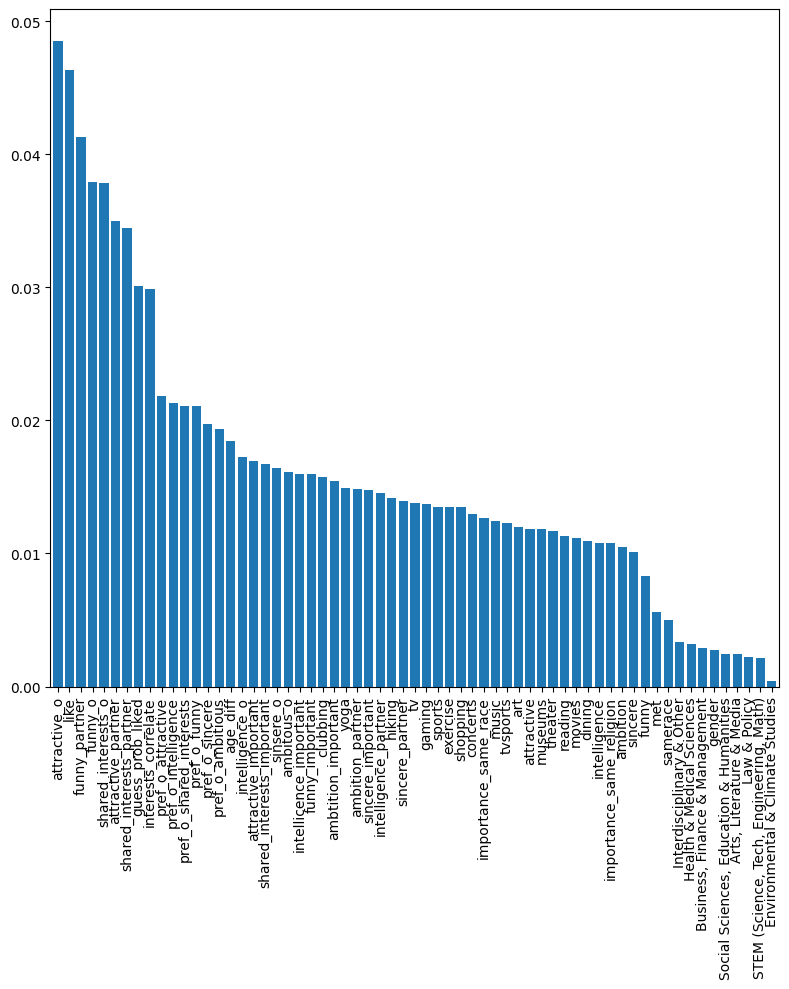

In [136]:
rf = RandomForestClassifier()

# Fit the classifier
rf.fit(X_train, y_train)

# Retrieve the feature importances
rf_importance = pd.Series(rf.feature_importances_, index = rf.feature_names_in_)
rf_importance = rf_importance.sort_values(ascending = False)

import matplotlib.pyplot as plt

# Visualizing the feature importances
fig = plt.figure(figsize = (8,10))
rf_importance.plot(kind = 'bar', width =0.8)
plt.tight_layout()
plt.show()